## Principal component analysis (PCA):
is a mathematical algorithm that reduces the dimensionality of the data while retaining most of the variation in the data set.¹.. It accomplishes this reduction by identifying directions, called principal components, along which the variation in the data is maximal. By using a few components, each sample can be represented by relatively few numbers instead of by values for thousands of variables. Samples can then be plotted, making it possible to visually assess similarities and differences between samples and determine whether samples can be grouped.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from io import StringIO
class_labels = pd.read_csv('data/class.tsv', sep='\t', header=None)
labels = class_labels[0].values

with gzip.open('data/columns.tsv.gz', 'rt') as f:
    lines = [line for line in f if not line.startswith('#')]

filtered_content = StringIO(''.join(lines))
gene_mapping = pd.read_csv(filtered_content, sep='\t')

with gzip.open('data/filtered.tsv.gz', 'rt') as f:
    expression_data = pd.read_csv(f, sep='\t')

expression_data.columns = expression_data.columns.str.strip()
xbp1_id = 4404
gata3_id = gene_mapping[gene_mapping['GeneSymbol'] == 'GATA3']['ID'].values[0]

xbp1_expression = expression_data[str(xbp1_id)].values
gata3_expression = expression_data[str(gata3_id)].values

colors = ['black' if label == 0 else 'red' for label in labels]

# Print the columns of expression_data
print(expression_data.columns)
print(gata3_id)
print('4404' in expression_data.columns)

Index(['1', '2', '6', '12', '13', '15', '16', '17', '20', '25',
       ...
       '27622', '27623', '27633', '27634', '27638', '27641', '27642', '27643',
       '27644', '27648'],
      dtype='object', length=16174)
4359
True


In [3]:
def perform_pca(X, n_components=None):
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X
    cov_matrix = np.cov(X_centered.T)  
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    if n_components is not None:
        eigenvectors = eigenvectors[:, :n_components]
        eigenvalues = eigenvalues[:n_components]
    X_projected = X_centered @ eigenvectors
    return eigenvectors, eigenvalues, X_centered, X_projected

## Plotting Gene expreesion vs GATA3

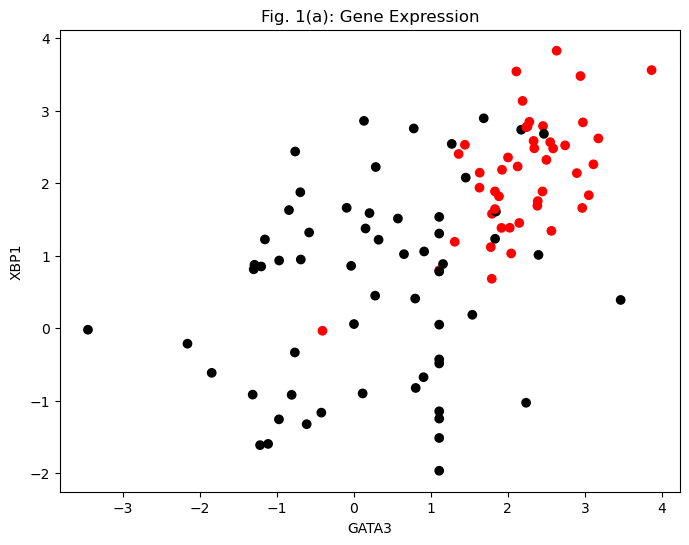

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(gata3_expression, xbp1_expression, c=colors)
plt.xlabel('GATA3')
plt.ylabel('XBP1')
plt.title('Fig. 1(a): Gene Expression')
plt.savefig('PCA-figure_a.png')
plt.show()

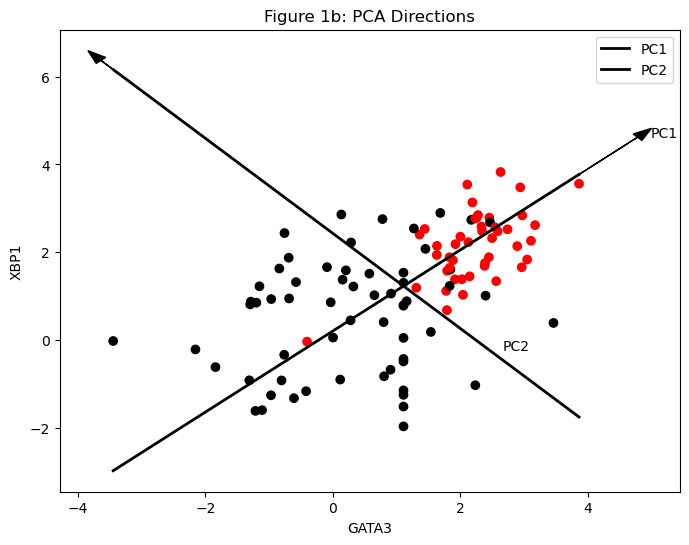

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def perform_pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices][:n_components]
    eigenvectors = eigenvectors[:, sorted_indices][:, :n_components]
    X_projected = np.dot(X_centered, eigenvectors)
    return eigenvectors, eigenvalues, X_centered, X_projected

x = np.column_stack((gata3_expression, xbp1_expression))
eigenvectors, eigenvalues, x_centered, x_projected = perform_pca(x)
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]
projection_pc1 = np.dot(x_centered, pc1)
projection_pc2 = np.dot(x_centered, pc2)

plt.figure(figsize=(8, 6))
plt.scatter(gata3_expression, xbp1_expression, c=colors)
mean_gata3 = np.mean(gata3_expression)
mean_xbp1 = np.mean(xbp1_expression)
x_range = np.linspace(min(gata3_expression), max(gata3_expression), 100)
y_pc1 = mean_xbp1 + (pc1[1] / pc1[0]) * (x_range - mean_gata3)
y_pc2 = mean_xbp1 + (pc2[1] / pc2[0]) * (x_range - mean_gata3)
plt.plot(x_range, y_pc1, color='black', label='PC1', linewidth=2)
plt.plot(x_range, y_pc2, color='black', label='PC2', linewidth=2)
plt.arrow(mean_gata3, mean_xbp1, -pc1[0]*5, -pc1[1]*5, head_width=0.2, head_length=0.3, fc='black', ec='black')
plt.arrow(mean_gata3 - pc2[0] * 2, mean_xbp1 - pc2[1] * 2, -pc2[0]*5, -pc2[1]*5, head_width=0.2, head_length=0.3, fc='black', ec='black')
plt.text(mean_gata3 - pc1[0] * 5 + 0.2, mean_xbp1 - pc1[1] * 5, 'PC1')
plt.text(mean_gata3 - pc2[0] * 7 + 0.2, mean_xbp1 - pc2[1] * 7, 'PC2')
plt.xlabel('GATA3')
plt.ylabel('XBP1')
plt.title('Figure 1b: PCA Directions')
plt.legend()
plt.savefig('PCA-figure_b.png')
plt.show()


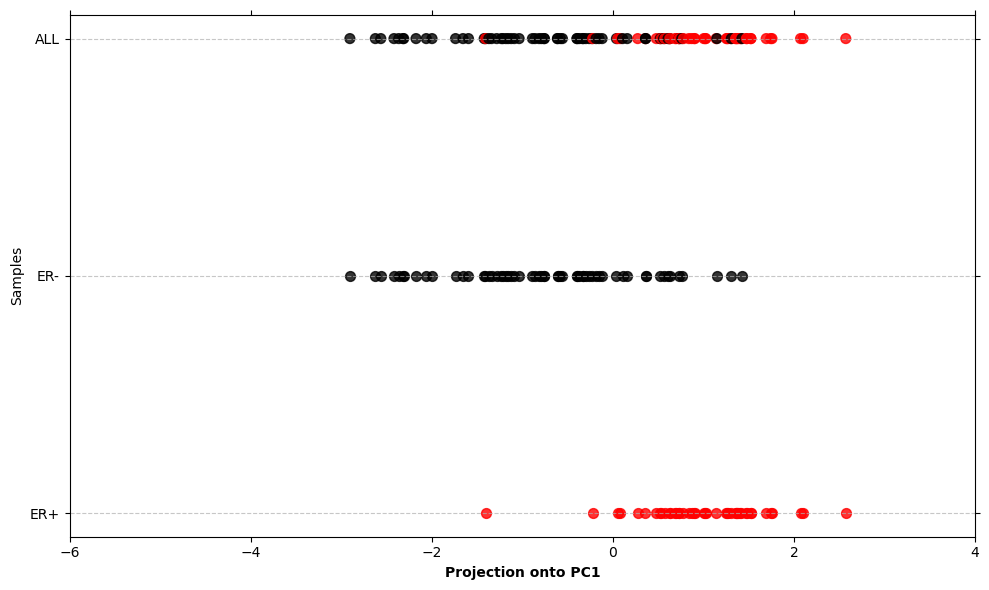

Variance explained by PC1: 0.7786
Variance explained by PC2: 0.2214


In [13]:
from sklearn.preprocessing import StandardScaler
X = np.column_stack((gata3_expression, xbp1_expression))
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
components, eigenvalues, X_centered, X_projected = perform_pca(X_standardized, n_components=2)
projection_pc1 = X_projected[:, 0]
eigengene_pc1 = components[:, 0]
er_pos_pc1 = projection_pc1[labels == 1]
er_neg_pc1 = projection_pc1[labels == 0]

plt.figure(figsize=(10, 6))

y_all = 2  
y_er_neg = 1  
y_er_pos = 0  

projection_pc1_sorted = np.sort(projection_pc1)
er_neg_pc1_sorted = np.sort(er_neg_pc1)
er_pos_pc1_sorted = np.sort(er_pos_pc1)
sorted_indices = np.argsort(projection_pc1)
colors_sorted = np.array(colors)[sorted_indices]

plt.scatter(projection_pc1_sorted, np.full_like(projection_pc1_sorted, y_all), c=colors_sorted, s=50, alpha=0.8, marker='o')
plt.scatter(er_neg_pc1_sorted, np.full_like(er_neg_pc1_sorted, y_er_neg), c='black', s=50, alpha=0.8, marker='o')
plt.scatter(er_pos_pc1_sorted, np.full_like(er_pos_pc1_sorted, y_er_pos), c='red', s=50, alpha=0.8, marker='o')

plt.yticks([y_all, y_er_neg, y_er_pos], ['ALL', 'ER-', 'ER+'])
plt.xlabel('Projection onto PC1', fontweight='bold')
plt.ylabel('Samples')
plt.xlim(-6, 4)

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.gca().spines['left'].set_visible(True)  
plt.gca().spines['right'].set_visible(True) 
plt.gca().spines['top'].set_visible(True) 
plt.gca().tick_params(left=True, right=True, top=True, bottom=True)

plt.tight_layout()

plt.savefig('PCA-figure_c.png')
plt.show()

total_variance = np.sum(eigenvalues)
print(f"Variance explained by PC1: {eigenvalues[0]/total_variance:.4f}")
print(f"Variance explained by PC2: {eigenvalues[1]/total_variance:.4f}")


### Why PCA
PCA is an unsupervised learning method that helps in dimensionality reduction. It is especially useful when you have a high-dimensional dataset (many genes in this case) but want to focus on the most important patterns in the data. By projecting the data onto principal components, we reduce the complexity while retaining most of the variance, making it easier to visualize and interpret.







